###Experiments
Testing first all the capabilities of the project

In [ ]:
#first installing pump in this environment
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 66.2 MB/s eta 0:00:00


In [ ]:
#Uploading the Solutions module into the working directory to able to use them pick Solutions.py
from google.colab import files
uploaded = files.upload()


Saving Solutions.py to Solutions.py


In [ ]:
#Importing module
#import pulp
import matplotlib.pyplot as plt
import time
#import Solutions
#from Solutions import Cities
import numpy as np
import random

In [ ]:
#test for the Cities class solutions module
N=50
alpha=2
City_obj=Cities(N)
coords=City_obj.gen_coords_SAI(N, seed=42)
dist_m=City_obj.dist_mat_SAI(coords)
cosines=City_obj.cos_SAI(coords)

In [ ]:
print(max(cosines))

(49, 48, 47)


In [ ]:
#Testing Optimal_CBC
from Solutions import Optimal_CBC
coords=City_obj.get_cities()
matrix_dist=City_obj.compute_dis(coords,N)
edges=City_obj.get_edges()
seq_total_dist=Cities.get_total_distance(matrix_dist,coords)
seq_total_dist_2=Cities.get_total_distance_2(coords)

TSP_opt=Optimal_CBC(a_number_of_cities=N,a_matrix_of_distances=matrix_dist,a_edges=edges)

#Solution=TSP_opt.solver_method()


In [ ]:
#Testing Heurist_SimAnn
from Solutions import Heurist_SimAnn
TSP_opt_2=Heurist_SimAnn(a_number_of_cities=N,a_matrix_of_distances=matrix_dist,a_edges=edges,a_coordinates=coords,a_max_iterations_in=500,a_max_iterations_out=2000,a_factor2=0.99) #a_max_iterations=10,a_factor1=0.2,a_factor2=0.994,a_max_iterations=20,a_factor1=0.2,a_factor2=0.993

Solution1=TSP_opt_2.solver_method()

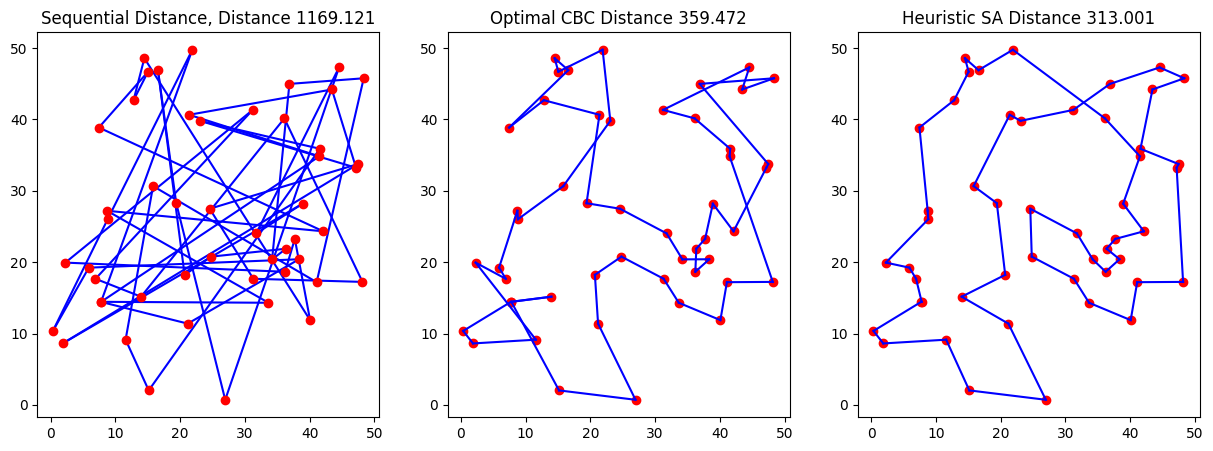

In [ ]:
#Testing Plot Capability
heuristic=Solution1[1]
Solution1[0]
from Solutions import Plots_TSP

Plt=Plots_TSP(coords,Solution[1],heuristic,Solution[2],Solution1[0],seq_total_dist)

Plt.plot_sln()

In [ ]:
#Testing functions and Class for optimal new problem
from Solutions import generate_coordinates,compute_distance_matrix,compute_cosII,Opt_TSPV_CBC

num_ciudades = 10
capacidad=5
num_vendedores =num_ciudades// capacidad
coords = generate_coordinates(num_ciudades, seed=42)
dist_matrix = compute_distance_matrix(coords)
cosines = compute_cosII(dist_matrix, coords)
new_problem=Opt_TSPV_CBC(num_ciudades,num_vendedores,dist_matrix,cosines,capacidad,a_weight_fact=2)


In [ ]:
x,z=new_problem.solver_method()

In [ ]:
from Solutions import Heurist_SimAnn_NP,Plots_MTSP

number_of_travels=N//capacidad
City_obj=Cities(N)
coords=City_obj.gen_coords_SAI(N, seed=42)
dist_m=City_obj.dist_mat_SAI(coords)
cosines=City_obj.cos_SAI(coords)



In [ ]:
#Testing functions and Class for SA new problem
NewP_opt_2=Heurist_SimAnn_NP(N,number_of_travels,dist_m,cosines,coords,a_max_iterations_in=500,a_max_iterations_out=1000,a_alpha_fac=alpha)#(a_number_of_cities=n,a_matrix_of_distances=matrix_dist,a_edges=edges,a_coordinates=coords,a_max_iterations_in=500,a_max_iterations_out=1000,a_factor2=0.99) #a_max_iterations=10,a_factor1=0.2,a_factor2=0.994,a_max_iterations=20,a_factor1=0.2,a_factor2=0.993

Solution1=NewP_opt_2.solver_method()

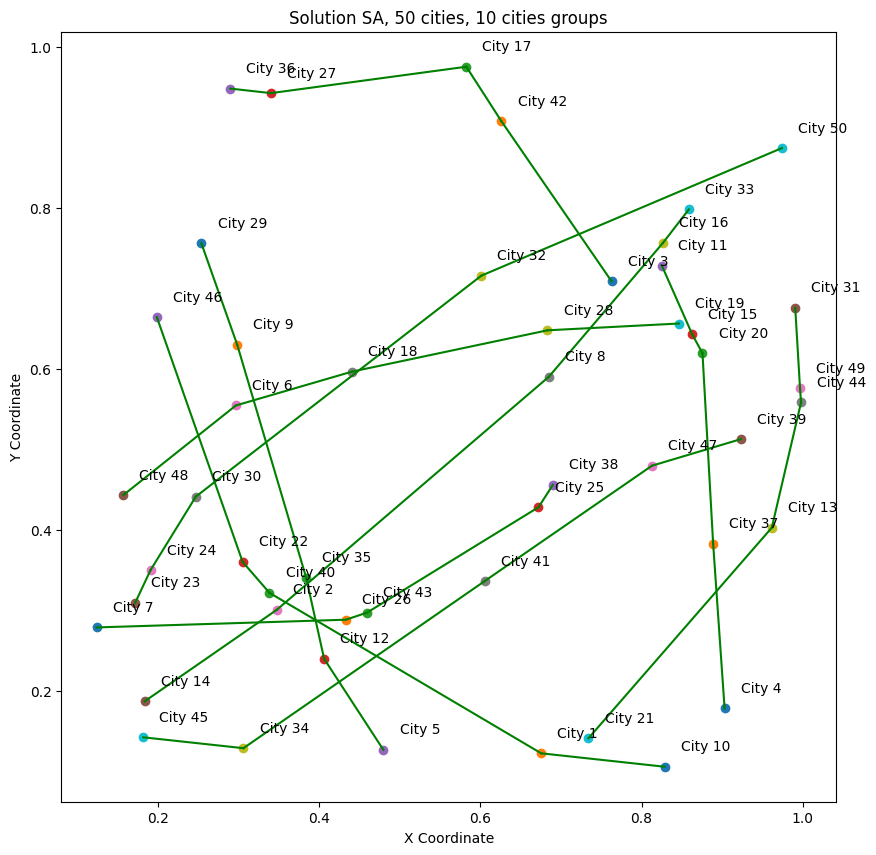

In [ ]:
#testing plots
#print(len(Solution1[1]))
#groups = [a_coords[1][i:i+a_capacity] for i in range(0, a_num_cities, a_capacity)]
Plots_MTSP.plot_sln_MH(capacidad,Solution1[1],N,a_MH='SA')

In [ ]:
#Testing the genetic algorithm class
from Solutions import Heurist_GA_NP
mutation_r=0.035#0.045 #0.035
solutions=Heurist_GA_NP.genetic_process_2(a_coordinates=coords,a_num_of_travels=number_of_travels,a_dist_m=dist_m,a_cosines=cosines,a_num_generation=2000,a_cross=0.98,a_mutation=mutation_r,a_population_size=300,a_alpha=alpha)

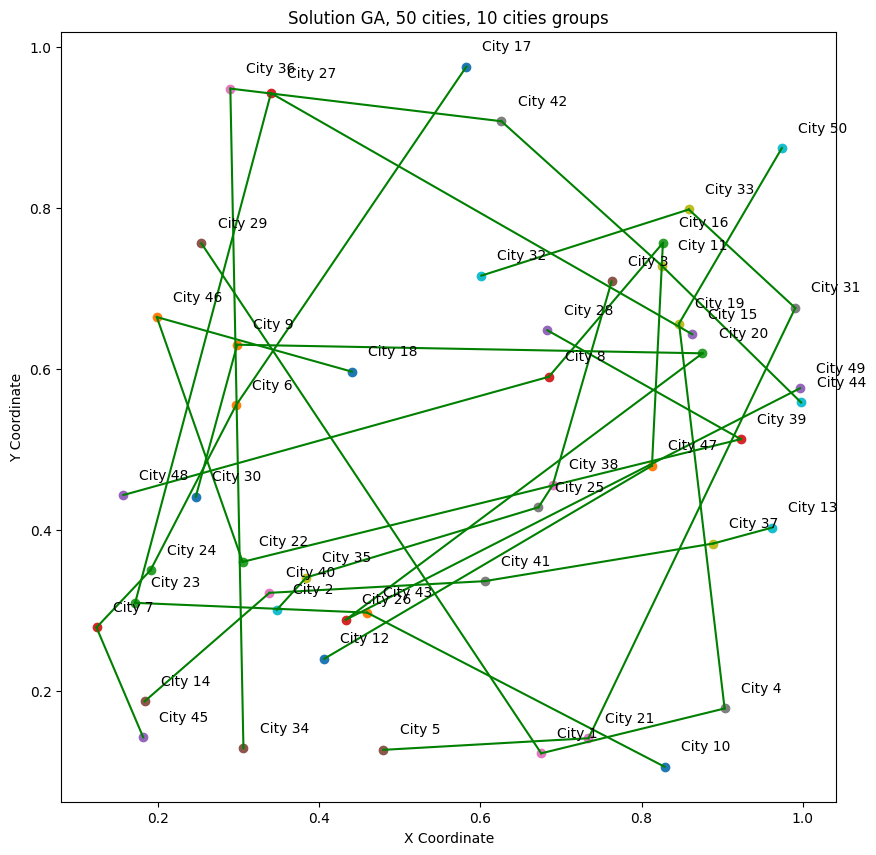

In [ ]:
Plots_MTSP.plot_sln_MH(capacidad,solutions[1],N,a_MH='GA')

In [ ]:
#Testing the genetic algorithm class original
from Solutions import Heurist_GA_NP,Cities
solutions=Heurist_GA_NP.genetic_process_1(a_coordinates=coords,a_num_of_travels=number_of_travels,a_dist_m=dist_m,a_cosines=cosines,a_num_generation=2000,a_cross=0.98,a_mutation=mutation_r,a_population_size=500,a_alpha=alpha)

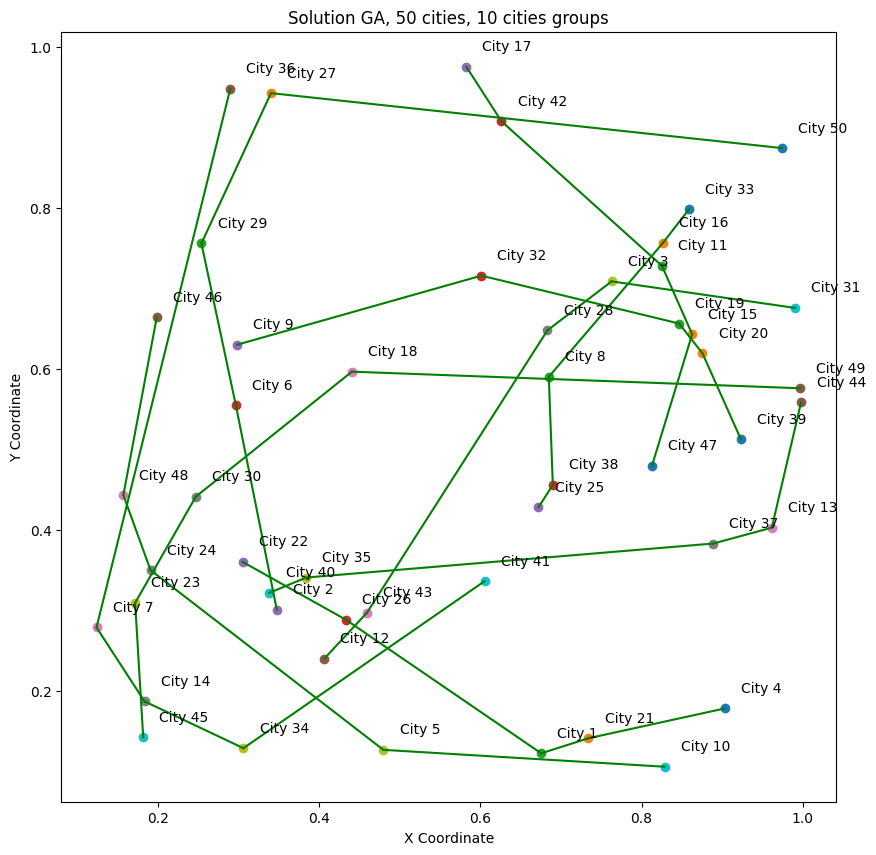

In [ ]:
Plots_MTSP.plot_sln_MH(capacidad,solutions[1],N,a_MH='GA')

Then experiment is to run all methods (some of them will not allow as the may take for days), with N=10,20,30,40,50,100,200, and for those that apply Capacity=5, meaninng that each subtour visits 5 cities(sites) alpha value of 2.

In [ ]:
from copy import Error
#TODO: function that runs the different sizes of the problem and record the time for each size. Each size must be run 10 times and compute the average
#then with the average time plot a avetage time vs size of the problem only for the two Metaheuristics.
#from Solutions import Heurist_GA_NP,Heurist_SimAnn_NP,Cities

def experiment(a_method):
    capacity = 5
    cities_list = [10,20,30,40,50,100,200]
    #methods = ["SA", "GA"]
    City_obj=Cities(1)
    result={}

    for number_of_cities in cities_list:
      times = []
      fitness=[]
      solutions=[]
      number_of_travels=number_of_cities//capacity
      coords=City_obj.gen_coords_SAI(number_of_cities, seed=42)
      dist_m=City_obj.dist_mat_SAI(coords)
      cosines=City_obj.cos_SAI(coords)
      alpha=0.5 #Equal importance both of them

      if a_method == "SA":
            NewP_opt_2=Heurist_SimAnn_NP(number_of_cities,number_of_travels,dist_m,cosines,coords,a_max_iterations_in=500,
                                         a_max_iterations_out=2000,a_alpha_fac=alpha)
            for _ in range(10):
                start_time = time.time()
                sol=NewP_opt_2.solver_method()
                end_time = time.time()
                execution_time = end_time - start_time
                times.append(execution_time)
                fitness.append(sol[0][0])
                solutions.append(sol[1])
      elif a_method == "GA":
        for _ in range(10):
                start_time = time.time()
                solution=Heurist_GA_NP.genetic_process_1(a_coordinates=coords,a_num_of_travels=number_of_travels,a_dist_m=dist_m,
                                                  a_cosines=cosines,a_num_generation=2000,a_cross=0.98,a_mutation=0.035,a_population_size=500,a_alpha=alpha)
                end_time = time.time()
                execution_time = end_time - start_time
                times.append(execution_time)
                fitness.append(City_obj.objective_comp(solution[0],number_of_travels,dist_m,cosines,alpha=alpha) )
                solutions.append(solution[0])
      else:
        raise Exception("That is not a valid string for a method pick 'GA' or 'SA' please")

      result['number cities'+str(number_of_cities)]={'method':a_method,'excution_time':np.mean(np.array(times)),'fitness':np.mean(np.array(fitness)),'solutions':solutions}
      print(result)

    return result

# Run the experiment
experiment_results_SA = experiment('GA')


{'number cities10': {'method': 'GA', 'excution_time': 19.642932224273682, 'fitness': 1.4306682552158128, 'solutions': [[((0.34752638653220735, 0.3008896643339405), 1), ((0.29677417732324307, 0.5548197592930262), 5), ((0.29839655983662705, 0.6303391154883179), 8), ((0.6848959940015709, 0.590447332542895), 7), ((0.7628240927476112, 0.7090295386806201), 2), ((0.12388237271547727, 0.2789538856179836), 6), ((0.4797296377167434, 0.12681749749426333), 4), ((0.6754841186120953, 0.12250967970040025), 0), ((0.828487411010044, 0.10584888371025492), 9), ((0.9029616109343609, 0.17824494936647456), 3)], [((0.9029616109343609, 0.17824494936647456), 3), ((0.828487411010044, 0.10584888371025492), 9), ((0.6754841186120953, 0.12250967970040025), 0), ((0.4797296377167434, 0.12681749749426333), 4), ((0.12388237271547727, 0.2789538856179836), 6), ((0.34752638653220735, 0.3008896643339405), 1), ((0.29677417732324307, 0.5548197592930262), 5), ((0.29839655983662705, 0.6303391154883179), 8), ((0.684895994001570

Perfomance visualisation report for the two metaheruistics used with different input size:

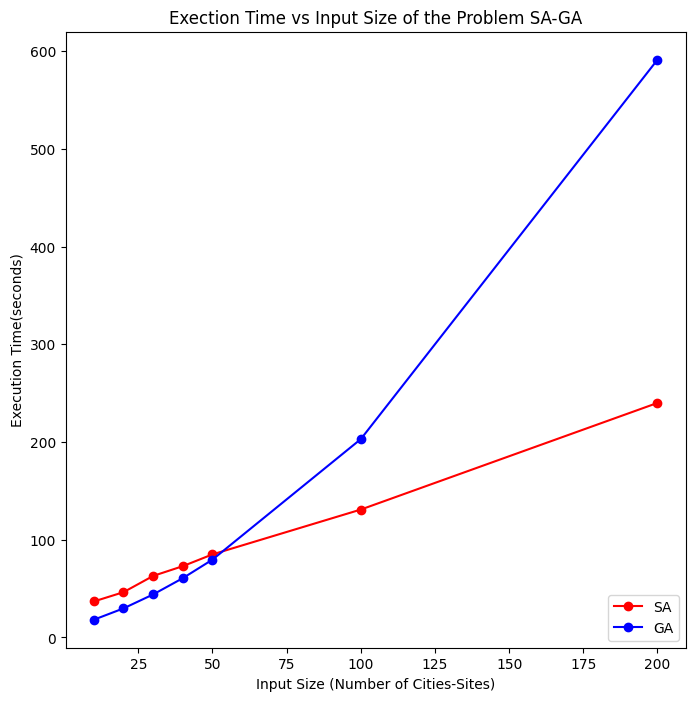

In [ ]:

cities_list = [10,20,30,40,50,100,200]
#print(np.mean(np.array(cities_list)))
results_SA={'number cities10': {'method': 'SA', 'excution_time': 36.86594398021698}, 'number cities20': {'method': 'SA', 'excution_time': 46.36303267478943}, 'number cities30': {'method': 'SA', 'excution_time': 63.01279120445251}, 'number cities40': {'method': 'SA', 'excution_time': 72.99408659934997}, 'number cities50': {'method': 'SA', 'excution_time': 85.0444810628891}, 'number cities100': {'method': 'SA', 'excution_time': 130.92485935688018},'number cities200': {'method': 'SA', 'excution_time': 240.05285093784332}}
results_GA={'number cities10': {'method': 'GA', 'excution_time': 18.173286652565004}, 'number cities20': {'method': 'GA', 'excution_time': 29.775209546089172}, 'number cities30': {'method': 'GA', 'excution_time': 44.06462264060974}, 'number cities40': {'method': 'GA', 'excution_time': 60.718254280090335}, 'number cities50': {'method': 'GA', 'excution_time': 79.69755659103393}, 'number cities100': {'method': 'GA', 'excution_time': 203.03041207790375}, 'number cities200': {'method': 'GA', 'excution_time': 591.2910721063614}}
#print(results_SA['number cities10']['excution_time'])
print()


times_SA=[results_SA[result]['excution_time'] for result in results_SA]
times_GA=[results_GA[result]['excution_time'] for result in results_GA]
#print(times)
plt.figure(figsize=(8, 8))

line1=plt.plot(cities_list,times_SA,marker='o',color='r',label='SA')
line2=plt.plot(cities_list,times_GA,marker='o',color='b',label='GA')


plt.title('Exection Time vs Input Size of the Problem SA-GA')
plt.xlabel('Input Size (Number of Cities-Sites)')
plt.ylabel('Execution Time(seconds)')
plt.legend(loc='lower right')
plt.show()




Then we will do a pareto front for the two metaheruistics, and comment.

In [ ]:
#Modification Cities class for pareto front experiment:
class Cities:
    def __init__(self, a_num_cities,a_grid_size=50):
        self.num_cities = a_num_cities
        self.grid_size= a_grid_size
        self.cities = self.create_cities()

    ##########################################New Problem################################
    @staticmethod
    def dist_mat_SAI(coordinates):


      num_cities = len(coordinates)
    #distance_matrix = np.zeros((num_cities, num_cities))
      distance_matrix={}

      for i in range(num_cities):
          for j in range(i+1, num_cities):
                #print(f'values: ({i},{j})')
                x1, y1 = coordinates[i][0]
                x2, y2 = coordinates[j][0]
                distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                #distance_matrix[coordinates[i][1],coordinates[j][1]]= distance # def
                #distance_matrix[coordinates[j][1],coordinates[i][1]]= distance # def
                #distance_matrix[i,j] = distance
                #distance_matrix[j,i] = distance # Matrix is symmetric
                distance_matrix[(i,j)] = distance # easier
                distance_matrix[(j,i)] = distance
                #print(distance_matrix)
                #print()
      return distance_matrix

    @staticmethod
    def cos_SAI(coordinates):


      num_cities = len(coordinates)
      cosines = {}
    #cosines_m = np.zeros((num_cities, num_cities,num_cities))

      for i in range(num_cities):
        for j in range(num_cities):
            for k in range(num_cities):
                if i != j and i != k and j != k:
                    # Vector from i to j
                    vec_ji = np.array(coordinates[i][0]) - np.array(coordinates[j][0])
                    # Vector from i to k
                    vec_jk = np.array(coordinates[k][0]) - np.array(coordinates[j][0])

                    # Compute the angle using dot product
                    cos_theta = np.dot(vec_ji, vec_jk) / (np.linalg.norm(vec_ji) * np.linalg.norm(vec_jk)) # all vectors going out from the mid vertex
                    #theta = np.pi-np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clipping is used to handle numerical errors, No need of this if the cosine is closer to -1 that is what we want

                    #cosines.append((i, j, k, cos_theta))
                    cosines[(i,j,k)]=(cos_theta+1)/2 #mapped from the range [-1,1] to [0,1] transformation y=(x+1)/2, this for having the similar maginitudes between distances and cosines



      return cosines # scaled cosine: mapped from the range [-1,1] to [0,1] transformation y=(x+1)/2

    @staticmethod
    def portion_list(list, num_portions):

      if num_portions <= 0:
        raise ValueError("Number of portions must be greater than 0.")

      if len(list) % num_portions != 0:
        raise ValueError(
        "The length of the list must be a multiple of the number of portions.")

      sublist_size = len(list) // num_portions
      sublists = []
      for i in range(num_portions):
        sublists.append(list[ (i * sublist_size) : ((i + 1) * sublist_size)])

      return sublists

    @staticmethod
    def compute_total_distance_and_sum_of_cosines(city_distances, city_cosines, cities):


      cum_distance = 0
      cum_of_cosines = 0
      N=len(cities)
      for i in range(N-1):
    #print(f'the number {i} city is {cities[i][1]} and neighbor {i+1} is {cities[i+1][1]} ')
        cum_distance += city_distances[(cities[i][1],cities[i+1][1])]
    #print(f'the cummulative distance so far is {cum_distance}')
      for i in range(N-2):
    #print(f'the number {i} city is {cities[i][1]} and 1st neighbor {i+1} is {cities[i+1][1]} and the 2nd neighbor {i+2} is {cities[i+2][1]} ')
        cum_of_cosines += city_cosines[(cities[i][1],cities[i+1][1],cities[i+2][1])]
    #print(f'the cummulative cosines so far is {cum_of_cosines}')

      return cum_distance, cum_of_cosines

    @staticmethod
    def objective_comp(coordinates,num_travels,distances,cosines,alpha): # or number of vendors, vehicules, journeys you would need to cover all the sites
      list_of_lists=Cities.portion_list(coordinates,num_travels)
      objective=0
      tot_dist=0
      tot_cos=0
      for l in list_of_lists:
        dist,cos=Cities.compute_total_distance_and_sum_of_cosines(distances,cosines,l)
        tot_dist+=dist
        tot_cos+=cos
        objective +=(1-alpha)*dist #Change for the pareto front (1-alpha)*dist rather than dist
        objective +=(alpha)*cos
      return (objective,tot_cos,tot_dist)

    @staticmethod
    def gen_coords_SAI(num_cities, seed=None):

        if seed is not None:
            random.seed(seed)
            np.random.seed(seed)

        coordinates = [((random.uniform(0.1, 1), random.uniform(0.1,1)),i) for i in range(num_cities)]
    #coordinates.append(('CO'))
        return coordinates


    #############################################TSP################
    def create_cities(self):
        return np.array([self.create_random_coordinates() for _ in range(self.num_cities)])

    def create_random_coordinates(self):
        x = np.random.uniform(0, self.grid_size)
        y = np.random.uniform(0, self.grid_size)
        return np.array((x, y))

    def get_cities(self):
        return self.cities

    def get_edges(self):
        return [(i,j) for i in range(self.num_cities) for j in range(self.num_cities) if i!=j] #np.array([(i,j) for i in range(self.num_cities) for j in range(self.num_cities) if i!=j] )



    @staticmethod # it can be called without an instance of a Cities object
    def compute_dis(a_cities,a_num_cities):
      return np.array([[np.linalg.norm(a_cities[i]-a_cities[j]) for j in range(a_num_cities)] for i in range(a_num_cities)])

    @staticmethod # it can be called without an instance of a Cities object
    def get_total_distance(a_distances,a_cities):
      total_distance=0
      for i in range(len(a_cities)-1):
        total_distance+=a_distances[i,i+1]
      total_distance+=a_distances[i+1,0]
      return total_distance

    @staticmethod
    def get_distance(a_point,b_point):
      return np.linalg.norm(a_point-b_point)

    @staticmethod
    def get_total_distance_2(a_cities):
      total_distance=0
      for i in range(len(a_cities)-1):
        total_distance+=Cities.get_distance(a_cities[i],a_cities[i+1])
      total_distance+=Cities.get_distance(a_cities[0],a_cities[-1])
      return total_distance

class Heurist_SimAnn_NP: #NP means new problem

  def __init__(self,a_number_of_cities,a_num_travels, a_matrix_of_distances,a_matrix_of_cos,a_coordinates,a_max_iterations_out,a_max_iterations_in,a_factor2=.99,a_alpha_fac=1):
    self.coordinates=a_coordinates
    self.matrix_dis=a_matrix_of_distances
    self.matrix_cos=a_matrix_of_cos
    self.max_iter_in=a_max_iterations_in
    self.factor2=a_factor2 #guesstimation to check
    self.max_iter_out=a_max_iterations_out
    self.num_trav=a_num_travels
    self.num_cities=a_number_of_cities
    self.capacity=(self.num_cities//self.num_trav)
    self.alpha=a_alpha_fac

  def solver_method(self):

    #Simulated annealing algorithm

    # Initial Distance

    #objective=Cities.get_total_distance(self.matrix_of_distances,self.coordinates)
    objective=Cities.objective_comp(self.coordinates,self.num_trav,self.matrix_dis,self.matrix_cos,self.alpha)
    #print('obj is: ',objective)

    #INITIAL TEMPERATURE GETTING FROM HILLER T_initial>|Zn-Zc|
    T_ini=30
    T=T_ini
    #print('T is: ',T)
    coords=self.coordinates.copy()
    #print('initial sln: ',coords)

    #time to control the loop
    start_time = time.time()

    for _ in range(self.max_iter_out):
      T=T*self.factor2
      #breaking the outer loop after 600 seconds
      if time.time() - start_time >= 600:
        print("600 seconds have passed. Breaking the loop.")
        break


      for _ in range(self.max_iter_in):# max iterations is the same.
        #random generator of neighbor solutions
        r1,r2=np.random.randint(0,self.num_cities,size=2)
        #temp=coords[r1].copy()
        temp=coords[r1]
        coords[r1]=coords[r2]
        coords[r2]=temp
        # new distance of the candidate solution:
        #mat_dist=Cities.compute_dis(coords,self.number_of_cities)

        candidate=Cities.objective_comp(coords,self.num_trav,self.matrix_dis,self.matrix_cos,self.alpha)



        #check the performance new solution
        if candidate[0]<objective[0]:# choose new solution if better

          objective=candidate

        else:

          p=np.random.uniform()

          if p< np.exp((objective[0]-candidate[0])/T): #choose worse sln with probability

            objective=candidate

          else: # Do not choose new solution
            temp=coords[r1]
            coords[r1]=coords[r2]
            coords[r2]=temp






    return objective,coords

class Heurist_GA_NP:

  @staticmethod
  def get_initial_pop(a_coordinates,a_initial_pop_size=50):
    nodes=len(a_coordinates)
    a=range(nodes)
    initial_population=[]
    for _ in range(a_initial_pop_size):
      order=np.random.choice(a=a, size=nodes, replace=False)
      initial_population.append([a_coordinates[i] for i in order])
    return initial_population

  @staticmethod
  def selection_tour_op(a_population,a_num_of_travels,a_dist_m,a_cosines,An_alpha,a_tourn_size=10): #Selection by tournament. Coverges very quickly for this problem, not good , stops in a local optima.
    # See alternatives. Sample a subset of the population, and then with that subset make the tournament, select a parent and repeat the process for the number of parents.
    city_obj=Cities(len(a_population[0]))
    a=range(len(a_population))
    order=np.random.choice(a=a, size=a_tourn_size, replace=False)
    tournament_pop=[a_population[i] for i in order]
    #print(tournament_pop)
    fitness_tournament={}

    for i in range(len(tournament_pop)):
      fitness_tournament[(i)]=city_obj.objective_comp(tournament_pop[i],a_num_of_travels,a_dist_m,a_cosines,alpha=An_alpha)[0]
    #print(fitness_tournament)

    parents_idx = sorted(fitness_tournament, key=fitness_tournament.get, reverse=False)[:2] #min thus reverse False
    #print('parents index in tournament population',parents_idx)
    parents=[tournament_pop[parents_idx[0]],tournament_pop[parents_idx[1]]]  # gentting the parents
    return parents

  @staticmethod
  def selection_roul_op(a_population,a_num_of_travels,a_dist_m,a_cosines,An_alpha):
     #Selection by tournament. Coverges very quickly for this problem, not good , stops in a local optima.
     city_obj=Cities(len(a_population[0]))
     #fitness since it is the minimum the desired
     fitn_values=[city_obj.objective_comp(ind,a_num_of_travels,a_dist_m,a_cosines,alpha=An_alpha)[0] for ind in a_population]
     min_scaled=abs(min(fitn_values))
     #inverse for the minimum porblem
     inv_fit_val=[1.0 / (1.0 + f +min_scaled ) for f in fitn_values]
     total_fitness=sum(inv_fit_val)
     #total_fitness = sum(1.0/(city_obj.objective_comp(ind,a_num_of_travels,a_dist_m,a_cosines,alpha=An_alpha)+1.0) for ind in a_population)
     #Two points for the two parents
     selection_points = np.random.uniform(0, total_fitness,size=2)
     # Sorting to further cutting
     selection_points=np.sort(selection_points)
     #List to be able to use the pop from list object
     selection_points=list(selection_points)
     #Showing the selected points
     #for i in selection_point:
     # print(f'The point selected is: {i}')

     #Current sum init and parents init
     current_sum = 0
     #parents=[]
     #looping over the initial pop assessing the place where the selected points are
     #parent=[ind for ind in a_population if]
     parent=[]
     #print(f'the points selected are {selection_points[0]} and {selection_points[1]}')
     for point in selection_points:
      #print('selected point: ',point)
      for fit_val,ind in zip(inv_fit_val,a_population):
        current_sum+=fit_val
        #print('current sum: ',current_sum)
        if (current_sum > point):
          parent.append(ind)
          #print('Parent selected: ',ind)
          current_sum=0
          break
     #print()
     #print(f'selected point:{selection_points[0]}')
     #for ind in a_population:
      #fit_val=1.0/(city_obj.objective_comp(ind,a_num_of_travels,a_dist_m,a_cosines,alpha=An_alpha)+1.0)
      #print(f'the fitness value is:{fit_val}')
      #current_sum += fit_val
      #print(f'the current_sum value is:{current_sum}')
      #if this condition holds means it found the selected point so recording in the parents list
      #There is a problem here, when all the populations chromosomes are the same somthing is happening, I will be solving this tomorrow.26/09/2023
      #if (current_sum > selection_points[0]):
        #print(f'selected chromosome, since {current_sum} > {selection_point[0]}.')
        #parents.append(ind)
        #print(f'Parents selected:{ind}')
        #As selection_point is sorted take away the element 0
        #if len(selection_points)>1:
          #selection_points.pop(0)
          #print(f'selected point:{selection_points[0]}')
        # When there is one element is because there are no more selected points so exit the for loop
        #else:
          #break
     #print('selected_point',selection_point)
     #print('parents len:',len(parents))
     #print('parent len:',len(parent))

     return parent#parents,parent


  @staticmethod
  def cross_op(a_parents):

    #print('parents length: ',len(a_parents))
    par_1=a_parents[0]
    par_2=a_parents[1]

    offspring1=Heurist_GA_NP.offspirng_creation_op(par_1,par_2)
    offspring2=Heurist_GA_NP.offspirng_creation_op(par_2,par_1)

    return offspring1,offspring2



  @staticmethod
  def offspirng_creation_op(a_par1,a_par2):

    r=np.random.randint(0,len(a_par1))
    #print('r: ',r)
    offspring=a_par1[:r]
    offspring=list(offspring)
    #print('offspring before cross :',offspring)
    mask=[item not in offspring for item in a_par2]
    for i in range(len(mask)):
        if mask[i]:
          offspring.append(a_par2[i])
    #print('offspring after cross :',offspring)
    return offspring

  @staticmethod
  def mutation_op(child):

    r=np.random.randint(0,len(child),size=2)
    #print('r1: ',r[0])
    #print('r2: ',r[1])
    temp=child[r[0]]
    #print('temp: ',temp)
    child[r[0]]=child[r[1]]
    #print('child: ',child)
    child[r[1]]=temp
    #print('child after mutation: ',child)

    return child

  @staticmethod
  def genetic_process_1(a_coordinates,a_num_of_travels,a_dist_m,a_cosines,a_alpha,a_num_generation=500,a_cross=0.98,a_mutation=0.035,a_population_size=50):


    #Generating initial population
    initial_population=Heurist_GA_NP.get_initial_pop(a_coordinates,a_initial_pop_size=a_population_size)
    #print(f'initial population size: {len(initial_population)}, the first chromosome: {initial_population[0]}')

    #Selecting the parents:
    parents=Heurist_GA_NP.selection_tour_op(initial_population,a_num_of_travels,a_dist_m,a_cosines,An_alpha=a_alpha,a_tourn_size=a_population_size)
    #print(f'initial parents number: {len(parents)}, the first parent: {parents[0]}')

    #print()

    for i in range(a_num_generation):

      population=[]
      #print(f'start of the generation {i}')
      for j in range(a_population_size//2):
        #Generating probability for crossing
        p_crossing=random.uniform(0, 1)
        #Crossing with a_cross probablity
        if a_cross > p_crossing:
          children=Heurist_GA_NP.cross_op(parents)
         # print(f'In par of chromosones {j}, occured a crossing')
        else:
          children=parents
         # print(f'In par of chromosones {j}, not occured a crossing')

        #two children

        for child in children:
          #Mutation with a_mutation probablity
          p_mutation=random.uniform(0, 1)
          if a_mutation > p_mutation:
            population.append(Heurist_GA_NP.mutation_op(child))
          #  print(f'In par of chromosones {j}, occured a MUTATION!! in one child')
          else:
            population.append(child)
        #    print(f'In par of chromosones {j}, not occured a mutation in one child')
       # print(f'the generation {i} has a population size of {len(population)}')
      #Selecting the parents new generation:
      #print(f'population size in generation {i}: {len(population)}')
      #print()
      #parents=Heurist_GA_NP.selection_tour_op(population,a_num_of_travels,a_dist_m,a_cosines,An_alpha=a_alpha,a_tourn_size=a_population_size)
      parents=Heurist_GA_NP.selection_tour_op(population,a_num_of_travels,a_dist_m,a_cosines,An_alpha=a_alpha,a_tourn_size=a_population_size)
      #parents=Heurist_GA_NP.selection_roul_op(population,a_num_of_travels,a_dist_m,a_cosines,An_alpha=a_alpha)
      #print(f'parents number: {len(parents)} for generation {i+1}, the first parent: {parents[0]}')


    return parents

    #This is a different methaheuristic but the same pple but the population evolves rather than being created in each generation
  @staticmethod
  def genetic_process_2(a_coordinates,a_num_of_travels,a_dist_m,a_cosines,a_alpha,a_num_generation=500,a_cross=0.999,a_mutation=0.035,a_population_size=50):

      #Population Initialisation
      population=Heurist_GA_NP.get_initial_pop(a_coordinates,a_initial_pop_size=a_population_size)
      #For using the class Cities fucntion
      city_obj=Cities(len(population[0]))
      #this will be the main loop for all generations
      for i in range(a_num_generation):
        #print('generation: ',i)
        # Number to pick the kind of selection to be applied at the moment roulette and tournament occurs in avegrage 50/50: if the number is alter would be 66/33
        p_type_sel=order=np.random.choice(2)

        if p_type_sel==1:
          parents=Heurist_GA_NP.selection_tour_op(population,a_num_of_travels,a_dist_m,a_cosines,An_alpha=a_alpha)
        else:
          parents=Heurist_GA_NP.selection_roul_op(population,a_num_of_travels,a_dist_m,a_cosines,An_alpha=a_alpha)
        #Generating probability for crossing
        p_crossing=random.uniform(0, 1)
        if a_cross > p_crossing:
          children=Heurist_GA_NP.cross_op(parents)
         # print(f'In par of chromosones {j}, occured a crossing')
        else:
          children=parents

        #Mutation operation but it happens to be when a probability is got it
        for child in children:
          #Mutation with a_mutation probablity
          p_mutation=random.uniform(0, 1)
          if a_mutation > p_mutation:
            population.append(Heurist_GA_NP.mutation_op(child))
          #  print(f'In par of chromosones {j}, occured a MUTATION!! in one child')
          else:
            population.append(child)

        #This is the updating of the population with those with better fitness function
        population=sorted(population, key=lambda ind: city_obj.objective_comp(ind,a_num_of_travels,a_dist_m,a_cosines,alpha=a_alpha))
        population = population[:a_population_size]

      return population[:2]




In [ ]:
#TODO: Pareto front for N=50 and different values of alpha, these are done for GA(process 1-gen=2000,pop_s=500, cross=0.98,mut=0.035 ) and SA(2000 out-500-in) only
#Initilise a test
N=50
alpha=0.9 # It has to be a number between 0 and 1
City_obj=Cities(N)
coords=City_obj.gen_coords_SAI(N, seed=42)
dist_m=City_obj.dist_mat_SAI(coords)
cosines=City_obj.cos_SAI(coords)
#Optimise with the two methods
#SA
#NewP_opt_2=Heurist_SimAnn_NP(N,10,dist_m,cosines,coords,a_max_iterations_in=500,
 #                                        a_max_iterations_out=2000,a_alpha_fac=alpha)
#sol=NewP_opt_2.solver_method() #sol[0][1]=total_cosines=obj1,sol[0][2]=total_distance=obj2
#GA
#solutions=Heurist_GA_NP.genetic_process_1(a_coordinates=coords,a_num_of_travels=10,a_dist_m=dist_m,
  #                                                a_cosines=cosines,a_num_generation=2000,a_cross=0.98,a_mutation=0.035,a_population_size=500,a_alpha=alpha)

#from Solutions import Plots_MTSP
#Plots_MTSP.plot_sln_MH(5,sol[1],N,a_MH='SA')
#Plots_MTSP.plot_sln_MH(5,solutions[1],N,a_MH='GA')

In [ ]:
print(sol[0][1],sol[0][2])
print(np.linspace(0., 1., 3))

0.9308384845872237 7.166831914213597
[0.  0.5 1. ]


In [ ]:
#Formal experiment
alphas = np.linspace(0., 1., 11)
#alphas = np.linspace(0., 1., 3)
#SA_objts=[]
GA_objts=[]
for alpha in alphas:

 # SA_alpha=[]
  GA_alpha=[]
  for _ in range(15):
    #SA
    #NewP_opt_2=Heurist_SimAnn_NP(N,10,dist_m,cosines,coords,a_max_iterations_in=500,
    #                                        a_max_iterations_out=2000,a_alpha_fac=alpha)
    #sol=NewP_opt_2.solver_method()
    #SA_alpha.append((sol[0][1],sol[0][2]))
    #SA_alpha.append((np.random.uniform(0,10),np.random.uniform(0,10)))
    #GA
    solutions=Heurist_GA_NP.genetic_process_1(a_coordinates=coords,a_num_of_travels=10,a_dist_m=dist_m,
                                                    a_cosines=cosines,a_num_generation=2000,a_cross=0.98,a_mutation=0.035,a_population_size=500,a_alpha=alpha)
    objectives=City_obj.objective_comp(solutions[0],10,dist_m,cosines,alpha)
    GA_alpha.append((objectives[1],objectives[2]))
    #GA_alpha.append((np.random.uniform(0,10),np.random.uniform(0,10)))
  #print(SA_alpha)
  #print(GA_alpha)
  #SA_objts.append((np.mean(np.array([item[0] for item in SA_alpha])),np.mean(np.array([item[1] for item in SA_alpha]))))
  GA_objts.append((np.mean(np.array([item[0] for item in GA_alpha])),np.mean(np.array([item[1] for item in GA_alpha]))))
  #print(SA_objts)
  #print(GA_objts)


#print(SA_objts)
print(GA_objts)





[(6.893955952681645, 4.663359695072404), (4.746716689329146, 5.133541874999836), (3.703656446814993, 5.717181096163289), (2.8394546741094784, 6.373423272157566), (2.3407631937011026, 6.857503474487684), (2.174280863114423, 7.482796590127998), (1.7732618023061015, 7.791868451806381), (1.9035685186770148, 8.151453336761008), (1.7820640378194483, 8.457161848781626), (1.9686976652359387, 9.007998693026229), (1.756659269910755, 9.159743757912707)]


In [ ]:
GA_objts=[(6.893955952681645, 4.663359695072404), (4.746716689329146, 5.133541874999836), (3.703656446814993, 5.717181096163289), (2.8394546741094784, 6.373423272157566), (2.3407631937011026, 6.857503474487684), (2.174280863114423, 7.482796590127998), (1.7732618023061015, 7.791868451806381), (1.9035685186770148, 8.151453336761008), (1.7820640378194483, 8.457161848781626), (1.9686976652359387, 9.007998693026229), (1.756659269910755, 9.159743757912707)]

In [ ]:
plt.plot([SA_objts[i][0] for i in range(len(SA_objts))],[SA_objts[i][1] for i in range(len(SA_objts))], marker='o')
plt.xlabel('Cosines-Objective 1')
plt.ylabel('Distance-Objective 2')
plt.title('SA Pareto-front')
plt.text(SA_objts[0][0]+0.2, SA_objts[0][1]+0.2, f"alpha={alphas[0]}")
plt.text(SA_objts[-1][0]+0.35, SA_objts[-1][1], f"alpha={alphas[-1]}")
plt.show()

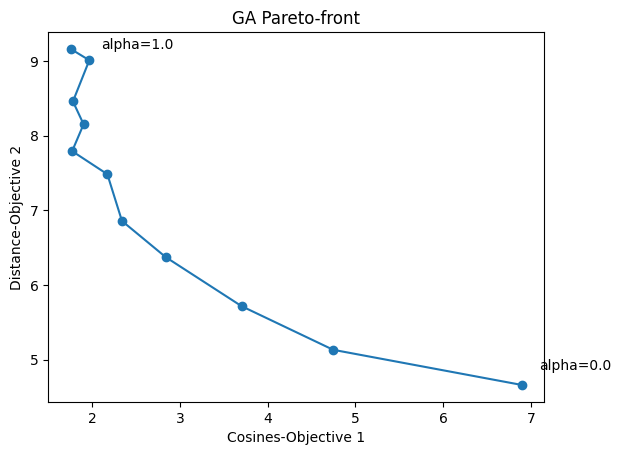

In [ ]:
plt.plot([GA_objts[i][0] for i in range(len(GA_objts))],[GA_objts[i][1] for i in range(len(GA_objts))], marker='o')
plt.xlabel('Cosines-Objective 1')
plt.ylabel('Distance-Objective 2')
plt.title('GA Pareto-front')
plt.text(GA_objts[0][0]+0.2, GA_objts[0][1]+0.2, f"alpha={alphas[0]}")
plt.text(GA_objts[-1][0]+0.35, GA_objts[-1][1], f"alpha={alphas[-1]}")
plt.show()

In [ ]:
print('SA')
print(SA_objts)
print('GA')
print(GA_objts)

SA
[(7.357154558905474, 3.7934332591633906), (4.833695096240755, 4.1946514870803), (3.8808989147117936, 4.558309162782565), (3.8355603818785426, 4.450906678869048), (1.2079095016196364, 5.504060021398653), (0.9901282792762497, 6.458837887710931), (1.2934274269346382, 6.686574845816996), (0.834185869936932, 8.256714909295114), (0.8878151063197217, 7.455165443854856), (0.7863870556073373, 7.464683687653662), (0.6020995795908795, 8.250377085471355)]
GA
[(7.045765689873951, 4.198552445162937), (7.973491567312157, 4.746369012764428), (3.3695790500925886, 6.836050580846434), (2.781107404633585, 6.681543832291957), (3.5582895139682456, 7.121589907301232), (2.1355219939135948, 7.623344360344533), (1.027219566060531, 7.523361923661294), (1.8709708324784367, 8.76672736817385), (2.8417563273396667, 9.611194692817824), (1.4587074102902349, 9.220493727847325), (2.462749434697626, 9.355583312925303)]
